### Importing the Libraries

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

### Function to calculate the number of bad grains

In [24]:
def count_bad_grains(img, th):
    
    # Bluring the image
    img = cv2.medianBlur(img,5)
    
    # Setting threshold value
    ret,thresh = cv2.threshold(img,th,255,cv2.THRESH_BINARY)
    
    # Finding Contours of the threshold image
    cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
    
    # set range between 15 to 25
    s1 = 15
    s2 = 25
    xcnts = [] 
    for cnt in cnts: 
        # if the value lies between s1 and s2
        if s1 < cv2.contourArea(cnt) < s2: 
            xcnts.append(cnt)
            
    return thresh, len(xcnts)

### Function to calculate the total number of grains

In [25]:
def count_total_grains(I):
    h,w = I.shape[:2]
    diff = (2,2,2)
    mask = np.zeros((h+2,w+2),np.uint8)
    cv2.floodFill(I,mask,(0,0), (255,255,255),diff,diff)


    T,I = cv2.threshold(I,160,255,cv2.THRESH_BINARY)
    I = cv2.medianBlur(I, 5)

    totalrice = 0
    oldlinecount = 0
    for y in range(0, h):
        oldc = 0
        linecount = 0
        start = 0
        for x in range(0, w):
            c = I[y,x] < 128;
            if c == 1 and oldc == 0:
                start = x
            if c == 0 and oldc == 1 and (x - start) > 10:
                linecount += 1
            oldc = c
        if oldlinecount != linecount:
            if linecount < oldlinecount:
                totalrice += oldlinecount - linecount
            oldlinecount = linecount
            
    return I, totalrice

### Analysis 

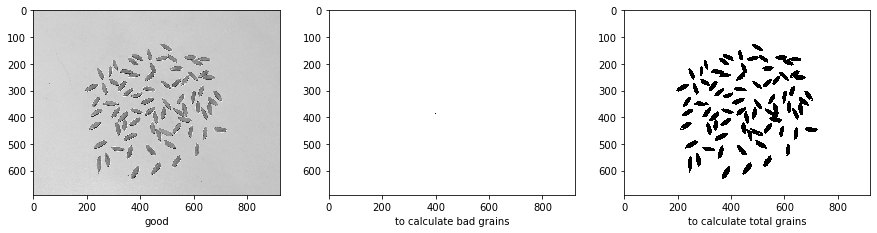

bad grains = 2
total grains = 59


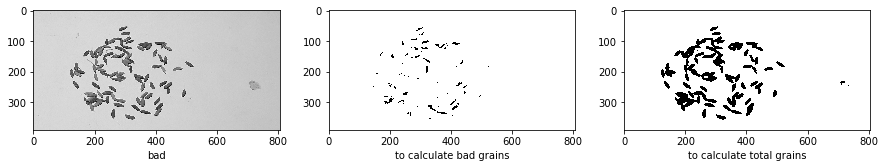

bad grains = 15
total grains = 65


In [26]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

img = cv2.imread('images/good_grain/1.jpg', 0)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.xlabel('good')

T_img, count = count_bad_grains(img, 78)
T_img2, total = count_total_grains(img)

fig.add_subplot(1,3,2)
plt.imshow(T_img, cmap='gray')
plt.xlabel('to calculate bad grains')

fig.add_subplot(1,3,3)
plt.imshow(T_img2, cmap='gray')
plt.xlabel('to calculate total grains')
plt.show()

print("bad grains =", count)
print("total grains =", total)

# ---------------------------------------------------------------------

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

img = cv2.imread('images/bad_grain/1.jpg', 0)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.xlabel('bad')

T_img, count = count_bad_grains(img, 78)
T_img2, total = count_total_grains(img)

fig.add_subplot(1,3,2)
plt.imshow(T_img, cmap='gray')
plt.xlabel('to calculate bad grains')

fig.add_subplot(1,3,3)
plt.imshow(T_img2, cmap='gray')
plt.xlabel('to calculate total grains')
plt.show()

print("bad grains =", count)
print("total grains =", total)

## Automation

In [32]:
base = 'images/good_grain/'
base2 = 'images/bad_grain/'

tot = []
bad = []
ratio = []


print('working on good_grains...')
for i in range(1, 81):
    img = cv2.imread(base + str(i)+ '.jpg', 0)
    
    T_img, count = count_bad_grains(img, 78)
    T_img2, total = count_total_grains(img)
    
    bad.append(count)
    tot.append(total)
    ratio.append(count/total)
    print(i, end='  ')
    

data_good = {'total_num':tot, 'bad_num':bad, 'ratio':ratio}

# --------------------------------------------------------------------------------------------

tot = []
bad = []
ratio = []


print('\nworking on bad_grains...')
for i in range(1, 81):
    img = cv2.imread(base2 + str(i)+ '.jpg', 0)
    
    T_img, count = count_bad_grains(img, 78)
    T_img2, total = count_total_grains(img)
    
    bad.append(count)
    tot.append(total)
    ratio.append(count/total)
    print(i, end='  ')

data_bad = {'total_num':tot, 'bad_num':bad, 'ratio':ratio}

working on good_grains...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  
working on bad_grains...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  

In [60]:
data_good['accepted'] = np.ones(80)
data_bad['accepted'] = np.zeros(80)

good = pd.DataFrame(data_good, columns = ['total_num', 'bad_num', 'ratio', 'accepted'])
bad = pd.DataFrame(data_bad, columns = ['total_num', 'bad_num', 'ratio', 'accepted'])

In [61]:
good.head(20)

,total_num,bad_num,ratio,accepted
0,59,2,0.033898,1.0
1,64,4,0.062500,1.0
2,58,0,0.000000,1.0
3,86,0,0.000000,1.0
4,53,0,0.000000,1.0
5,65,0,0.000000,1.0
6,71,0,0.000000,1.0
7,40,0,0.000000,1.0
8,102,2,0.019608,1.0
9,70,3,0.042857,1.0


In [62]:
bad.head(20)

,total_num,bad_num,ratio,accepted
0,65,15,0.230769,0.0
1,61,6,0.098361,0.0
2,92,4,0.043478,0.0
3,94,5,0.053191,0.0
4,61,4,0.065574,0.0
5,48,4,0.083333,0.0
6,61,6,0.098361,0.0
7,66,10,0.151515,0.0
8,73,16,0.219178,0.0
9,61,11,0.180328,0.0


## Need to make a combined dataset

In [63]:
bad.index += 80
frames = [good, bad]

result = pd.concat(frames)

In [ ]:
good.to_csv('good_grain.csv')
bad.to_csv('bad_grain.csv')

In [84]:
result.to_csv('combined.csv')

result

,total_num,bad_num,ratio,accepted
0,59,2,0.033898,1.0
1,64,4,0.062500,1.0
2,58,0,0.000000,1.0
3,86,0,0.000000,1.0
4,53,0,0.000000,1.0
...,...,...,...,...
155,92,16,0.173913,0.0
156,102,12,0.117647,0.0
157,125,13,0.104000,0.0
158,109,16,0.146789,0.0


### Visualizing the data

In [85]:
res_df = pd.read_csv('combined.csv')

In [68]:
res = res_df.to_numpy()

res_df

,Unnamed: 0,total_num,bad_num,ratio,accepted
0,0,59,2,0.033898,1.0
1,1,64,4,0.062500,1.0
2,2,58,0,0.000000,1.0
3,3,86,0,0.000000,1.0
4,4,53,0,0.000000,1.0
...,...,...,...,...,...
155,155,92,16,0.173913,0.0
156,156,102,12,0.117647,0.0
157,157,125,13,0.104000,0.0
158,158,109,16,0.146789,0.0


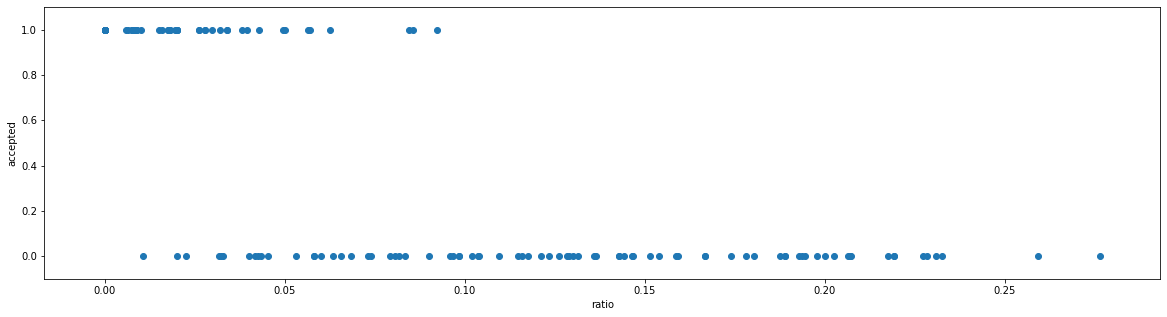

In [126]:
plt.figure(figsize=(20, 5))
plt.scatter(res[:, 3], res[:, 4])
plt.ylim(-0.1, 1.1)
plt.ylabel('accepted')
plt.xlabel('ratio')
# plt.plot(0.05*np.ones(2), range(0, 2), 'r')
plt.show()

The red line is where we are planning the machine will predict or something similar to this

### Training the Model

In [104]:
X = res_df[['total_num', 'bad_num', 'ratio']] # Features
Y = res_df.accepted # Target variable

In [105]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X, Y)

LogisticRegression()

In [106]:
Y_prediction = logistic_regression.predict(X)

In [107]:
Y_prediction

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

### Training Set Accuracy 

In [108]:
np.sum(Y == Y_prediction) / Y.shape[0]

0.8875

### Test set

In [116]:
base = 'test_images/good_grain/'
base2 = 'test_images/bad_grain/'

tot = []
bad = []
ratio = []


print('working on good_grains...')
for i in range(1, 21):
    img = cv2.imread(base + str(i)+ '.jpg', 0)
    
    T_img, count = count_bad_grains(img, 78)
    T_img2, total = count_total_grains(img)
    
    bad.append(count)
    tot.append(total)
    ratio.append(count/total)
    print(i, end='  ')
    

data_good = {'total_num':tot, 'bad_num':bad, 'ratio':ratio}

# --------------------------------------------------------------------------------------------

tot = []
bad = []
ratio = []


print('\nworking on bad_grains...')
for i in range(1, 21):
    img = cv2.imread(base2 + str(i)+ '.jpg', 0)
    
    T_img, count = count_bad_grains(img, 78)
    T_img2, total = count_total_grains(img)
    
    bad.append(count)
    tot.append(total)
    ratio.append(count/total)
    print(i, end='  ')

data_bad = {'total_num':tot, 'bad_num':bad, 'ratio':ratio}

working on good_grains...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  
working on bad_grains...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  

In [117]:
data_good['accepted'] = np.ones(20)
data_bad['accepted'] = np.zeros(20)

good_test = pd.DataFrame(data_good, columns = ['total_num', 'bad_num', 'ratio', 'accepted'])
bad_test = pd.DataFrame(data_bad, columns = ['total_num', 'bad_num', 'ratio', 'accepted'])

In [120]:
bad_test.index += 20
frames = [good_test, bad_test]

result_test = pd.concat(frames)

In [122]:
X_test = result_test[['total_num', 'bad_num', 'ratio']] # Features
Y_test = result_test.accepted # Target variable

In [123]:
Y_prediction = logistic_regression.predict(X_test)

In [125]:
np.sum(Y_test == Y_prediction) / Y_test.shape[0]

0.925